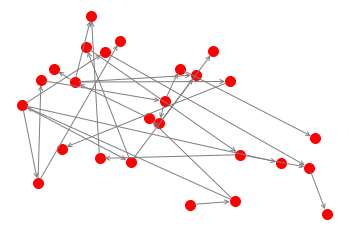

In [5]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('../../dataset/json2networkx/nusmv.syncarb5^2.B_0.json') as f:
    json_data = json.loads(f.read())

# rank json_data by 'type' and 'id', node - input_var - variable -> sequence like this
json_data = sorted(json_data, key=lambda x: (x['data']['type'], x['data']['id'], x['data']['application']))

#G = nx.DiGraph()
G = nx.MultiDiGraph()

G.add_nodes_from(
    elem['data']['id']
    for elem in json_data
)

edge_list = []

for elem in json_data: 
    if elem['data']['type']=='node':
        edge_list.extend((child_id,elem['data']['id']) for child_id in elem['data']['to']['children_id'])

G.add_edges_from(
    edge_list
)

# Print the graph by networkx api
# nx.draw(
#     G,
#     with_labels=True
# )

# Print the graph by matplotlib
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_color = 'r', node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off')
plt.show()

# Convert graph to numpy matrix
A=np.array(nx.to_numpy_matrix(G))

# Get G egdes to dataframe
edge_df = nx.to_pandas_adjacency(G, dtype=int) # The ordering is produced by G.nodes()

#Adjust the order of dataframe is possible: read nodes by our preferred order 

